# Getting Started with Qiskit

In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

$\newcommand{\ket}[1]{|#1\rangle}$
$\newcommand{\bra}[1]{\langle #1 |}$
Here, we are building and visualizing a circuit to see the GHZ state
$$\ket{\psi} = (\ket{000} + \ket{111})/\sqrt{2}$$

In [2]:
# Create a Quantum Circuit action on a quantum register of three qubits
circ = QuantumCircuit(3)

# Add a Hadamard gate on qubit 0, putting this qubit in superposition
circ.h(0)

# Add a CX(CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
#Add another CNOT gate for qubit 0 to 1 to complete the GHZ State
circ.cx(0, 2)

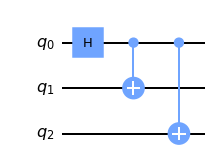

In [3]:
circ.draw("mpl")

## Statevector backend

Now, we run the circuit

In [4]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend("statevector_simulator")

# Create a Quantum Program for execution
job = execute(circ, backend) # NOTE, this is an asynchronous call

result = job.result() # This synchronizes the job's execution

outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


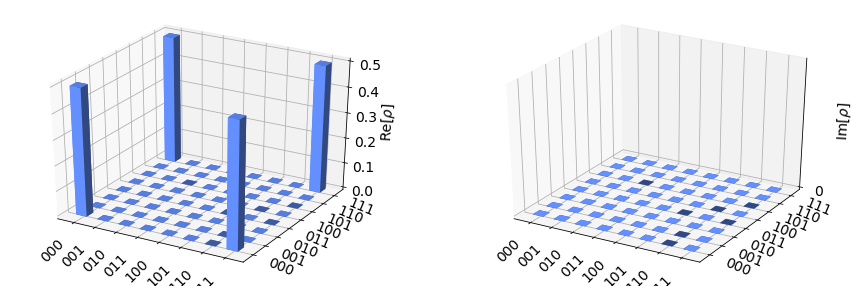

In [5]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

## Unitary backend

If all of the elements in the circuit are unitary operators, we can use the unitary_simulator backend.  This essentially builds a matrix representing the circuit.

In [6]:
backend = Aer.get_backend("unitary_simulator")
job = execute(circ, backend)
result = job.result()

# Show the results
print(result.get_unitary(circ, decimals=3))

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.     

## OpenQASM backend

In [7]:
meas = QuantumCircuit(3, 3) # TODO figure out what the second argument means
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition via +
qc = circ + meas

# draw the circuit
qc.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

In [19]:
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

counts = result_sim.get_counts(qc)
print(counts)

{'000': 514, '111': 510}


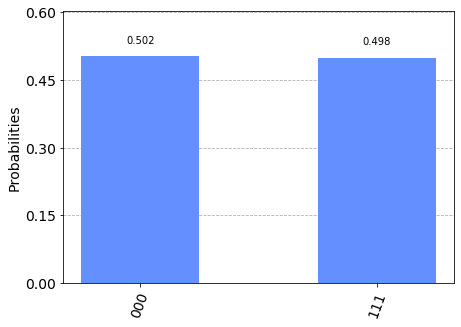

In [20]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

# Qiskit Visualizations

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools import job_monitor

In [2]:
# quantum circuit to make a Bell state
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0, 1], [0, 1])

# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator')
circ = bell + meas
result = execute(circ, backend, shots=1000).result()
counts = result.get_counts(circ)
print(counts)

{'00': 489, '11': 511}


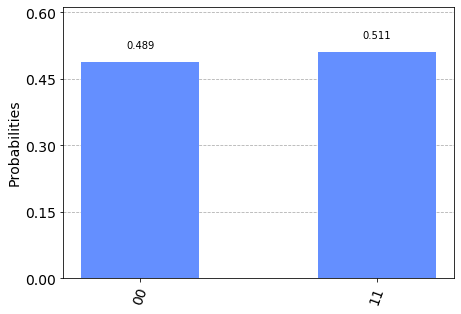

In [3]:
plot_histogram(counts)

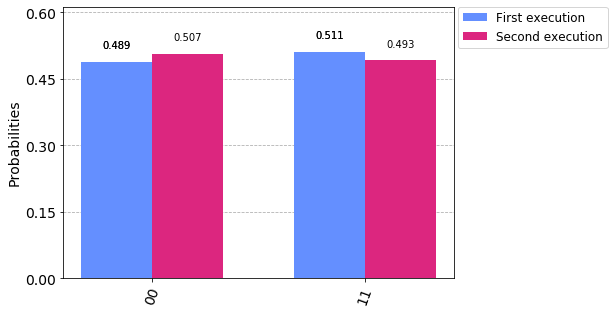

In [4]:
# Execute 2-qubit Bell state again
second_result = execute(circ, backend, shots=1000).result()
second_counts = second_result.get_counts(circ)
# Plot results with legend
legend = ["First execution", "Second execution"]
plot_histogram([counts, second_counts], legend=legend)

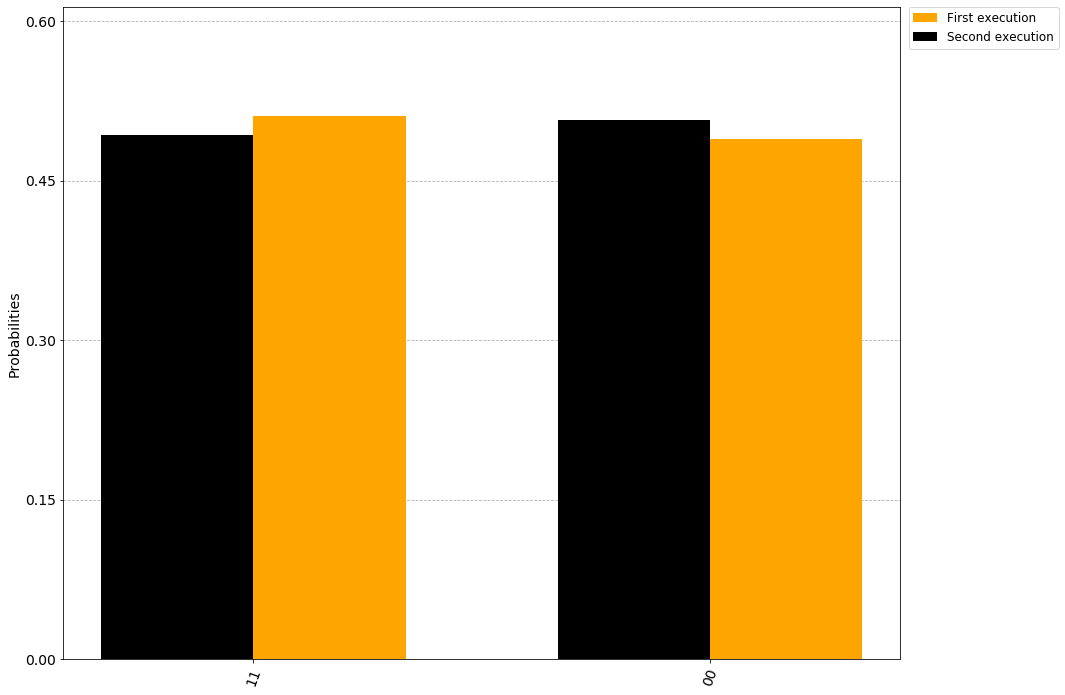

In [6]:
plot_histogram([counts, second_counts], legend=legend, sort="desc", figsize=(15, 12),
            color=["orange", "black"], bar_labels=False)

In [7]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

In [8]:
# Execute the quantum circuit
backend = BasicAer.get_backend("statevector_simulator")
result = execute(bell, backend).result()
psi = result.get_statevector(bell)

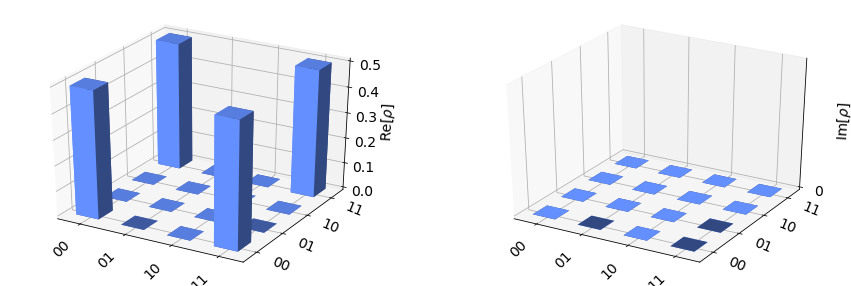

In [9]:
plot_state_city(psi)

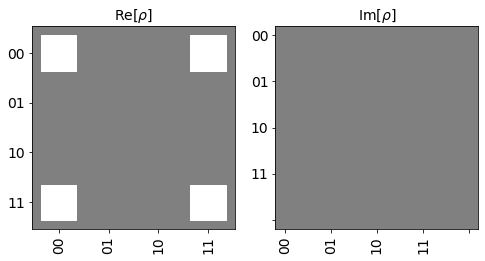

In [10]:
plot_state_hinton(psi)

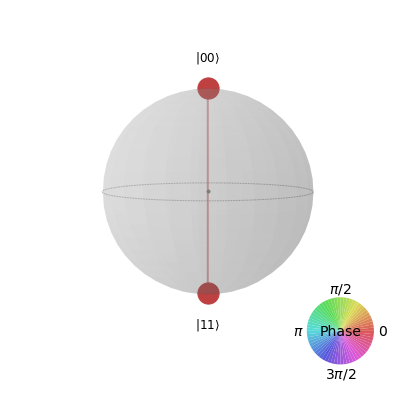

In [11]:
plot_state_qsphere(psi)

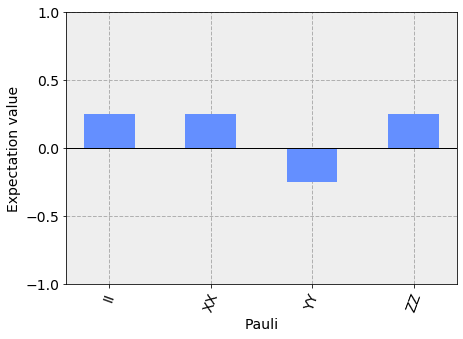

In [12]:
plot_state_paulivec(psi)

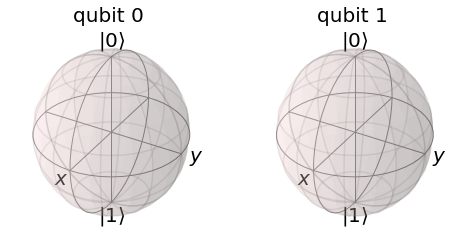

In [13]:
plot_bloch_multivector(psi)

### Options when using state plotting functions

**plot_state_city()** options:
 
 **- title** (str): a string that represents the plot title
 
 **- figsize** (tuple): figure size in inches (width, height)
 
 **- color** (list): A list of len=2 giving colors for real and imaginary components of matrix elements.

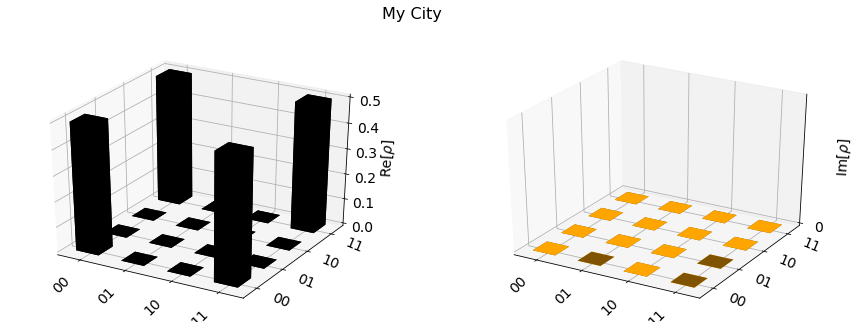

In [14]:
plot_state_city(psi, title="My City", color=["black", "orange"])

**plot_state_hinton()** options

 **- title**(str)
 
 **- figsize**(tuple)

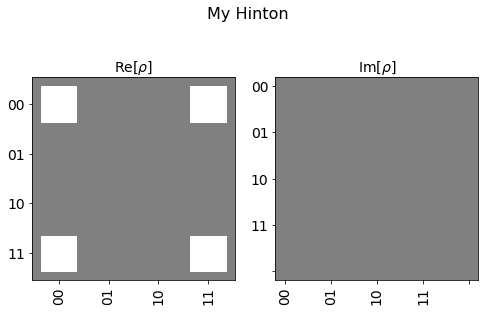

In [15]:
plot_state_hinton(psi, title="My Hinton")

**plot_state_paulivec()** options: title, figsize, color

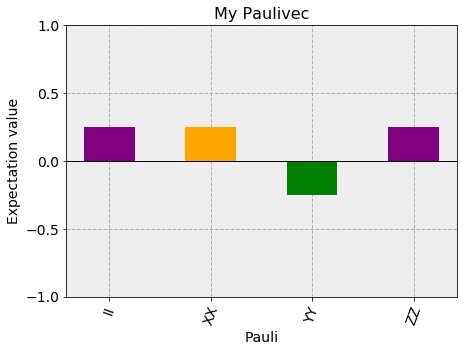

In [16]:
plot_state_paulivec(psi, title="My Paulivec", color=['purple', 'orange', 'green'])

**plot_state_qsphere** options: figsize

**plot_bloch_multivector** options: title, figsize

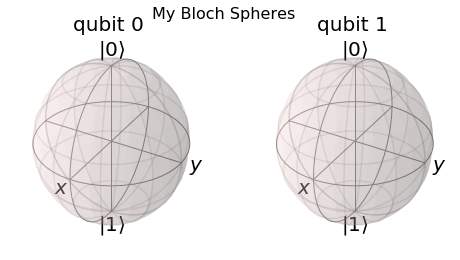

In [17]:
plot_bloch_multivector(psi, title="My Bloch Spheres")

## Interactive State Plots for Jupyter Notebooks
```
iplot_state_city(quantum_state)
iplot_state_paulivec(quantum_state)
iplot_state_qsphere(quantum_state)
iplot_state_hinton(quantum_state)
iplot_state_multivector(quantum_state)
```

## Plot Bloch Vector

In [18]:
from qiskit.visualization import plot_bloch_vector

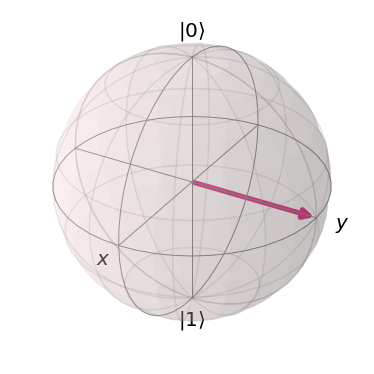

In [19]:
plot_bloch_vector([0, 1, 0])

Options for plot_bloch_vector: title, figsize

# Summary of Quantum Operations

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

In [3]:
q = QuantumRegister(1)

### u gates

In Qiskit they have a u3 gate which is given by
$$
u3(\theta, \phi, \lambda) = \begin{pmatrix} 
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda + i\phi}\cos(\theta/2)
\end{pmatrix}
$$

In [5]:
qc = QuantumCircuit(q)
qc.u3(pi/2, pi/2, pi/2, q)
qc.draw()

┌─────────────────┐
q0_0: ┤ U3(π/2,π/2,π/2) ├
      └─────────────────┘

In [7]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 7.07106781e-01+0.00000000e+00j, -4.32978028e-17-7.07106781e-01j],
       [ 4.32978028e-17+7.07106781e-01j, -7.07106781e-01+8.65956056e-17j]])

There exists the $u2(\phi, \lambda) = u3(\pi/2, \phi, \lambda)$ gate

In [8]:
qc = QuantumCircuit(q)
qc.u2(pi/2, pi/2, q)
qc.draw()

C:\Users\coleb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(π/2+λ) (1 pulse on hardware).
  


┌─────────────┐
q0_0: ┤ U2(π/2,π/2) ├
      └─────────────┘

In [9]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 7.07106781e-01+0.00000000e+00j, -4.32978028e-17-7.07106781e-01j],
       [ 4.32978028e-17+7.07106781e-01j, -7.07106781e-01+8.65956056e-17j]])

There exists the $u1(\lambda) = u3(0, 0, \lambda)$ gate

In [10]:
qc = QuantumCircuit(q)
qc.u1(pi/2, q)
qc.draw()

C:\Users\coleb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  


┌─────────┐
q0_0: ┤ U1(π/2) ├
      └─────────┘

In [11]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.000000e+00+0.j, 0.000000e+00+0.j],
       [0.000000e+00+0.j, 6.123234e-17+1.j]])

#### Identity Gate

In [12]:
qc = QuantumCircuit(q)
qc.id(q)
qc.draw()

┌───┐
q0_0: ┤ I ├
      └───┘

In [13]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

### Pauli gates

$\mathbf{X}$: bit-flip gate

In [14]:
qc = QuantumCircuit(q)
qc.x(q)
qc.draw()

┌───┐
q0_0: ┤ X ├
      └───┘

In [15]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[0.+0.0000000e+00j, 1.-1.2246468e-16j],
       [1.+0.0000000e+00j, 0.+0.0000000e+00j]])

$\mathbf{Y}$: bit-flip gate

In [16]:
qc = QuantumCircuit(q)
qc.y(q)
qc.draw()

┌───┐
q0_0: ┤ Y ├
      └───┘

In [17]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.000000e+00+0.j, -6.123234e-17-1.j],
       [ 6.123234e-17+1.j,  0.000000e+00+0.j]])

$\mathbf{Z}$: bit-flip gate

In [19]:
qc = QuantumCircuit(q)
qc.z(q)
qc.draw()

┌───┐
q0_0: ┤ Z ├
      └───┘

In [20]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 1.+0.0000000e+00j,  0.+0.0000000e+00j],
       [ 0.+0.0000000e+00j, -1.+1.2246468e-16j]])

### Clifford gates
Hadamard Gate

In [22]:
qc = QuantumCircuit(q)
qc.h(q)
qc.draw()

┌───┐
q0_0: ┤ H ├
      └───┘

In [23]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
       [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]])